### KNN Classification Exploratory Work

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../../data/external/breast-cancer.csv")

In [3]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [4]:
#Pull out the labels
diagnosis = df["diagnosis"]
print(diagnosis)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [5]:
#Clean Up Dataframe 
breast_cancer_df = df.drop('diagnosis', axis=1)
breast_cancer_df = breast_cancer_df.drop('id', axis=1)

In [6]:
print(breast_cancer_df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [7]:
# Test Train

x_train, x_test, y_train, y_test = train_test_split(breast_cancer_df, diagnosis, test_size = 0.3, random_state= 0)

In [9]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)

    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)

    scores[k] = [training_score, test_score]



In [10]:
for keys, values in scores.items():
    print(f'{keys}:{values}')

2:[0.9447236180904522, 0.9298245614035088]
3:[0.9522613065326633, 0.9181286549707602]
4:[0.9447236180904522, 0.9298245614035088]
5:[0.9396984924623115, 0.9473684210526315]
6:[0.9371859296482412, 0.9473684210526315]
7:[0.9371859296482412, 0.9532163742690059]
8:[0.9321608040201005, 0.9532163742690059]
9:[0.9321608040201005, 0.9590643274853801]
10:[0.9321608040201005, 0.9649122807017544]
11:[0.9346733668341709, 0.9649122807017544]
12:[0.9321608040201005, 0.9649122807017544]
13:[0.9296482412060302, 0.9649122807017544]
14:[0.9296482412060302, 0.9649122807017544]
15:[0.9321608040201005, 0.9649122807017544]
16:[0.9271356783919598, 0.9649122807017544]
17:[0.9321608040201005, 0.9649122807017544]
18:[0.9221105527638191, 0.9649122807017544]
19:[0.9246231155778895, 0.9649122807017544]
20:[0.9170854271356784, 0.9649122807017544]


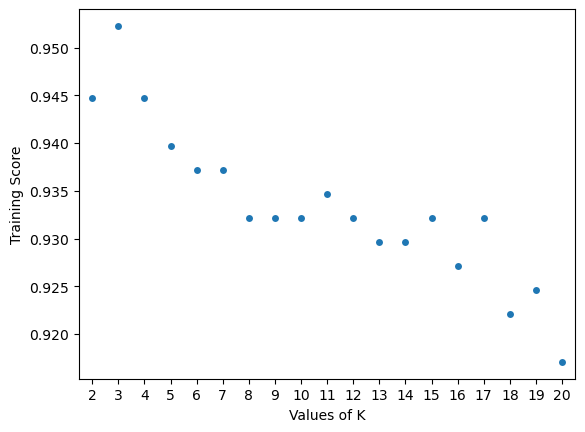

In [11]:
ax = sns.stripplot(x = K, y = training)
ax.set(xlabel='Values of K', ylabel='Training Score')
plt.show()

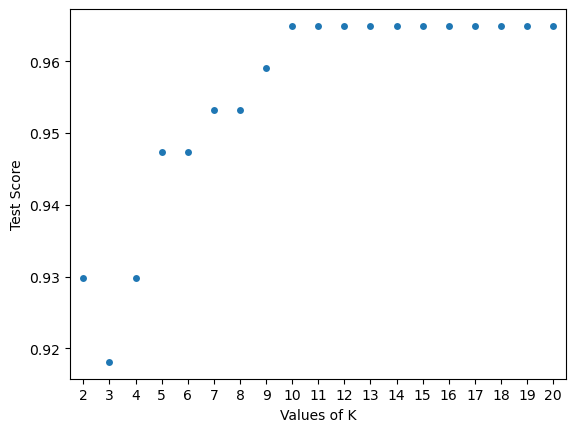

In [12]:
ax = sns.stripplot(x = K, y = test)
ax.set(xlabel='Values of K', ylabel='Test Score')
plt.show()

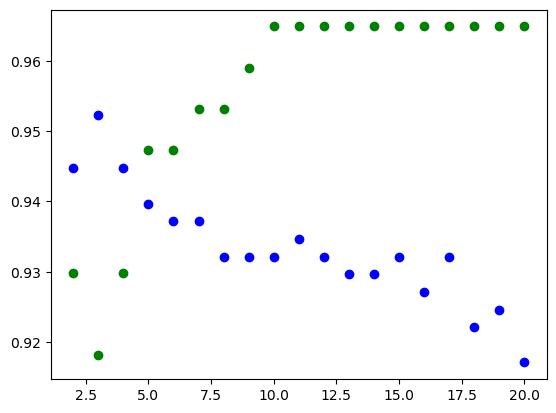

In [13]:
plt.scatter(K, training, color='b')
plt.scatter(K, test, color='g')
plt.show()